In [4]:
import matplotlib.pyplot as plt
import os

EXPERIMENT_DIR='/mnt/data/jemmons/vfeedbacknet-results/'

batch: 33


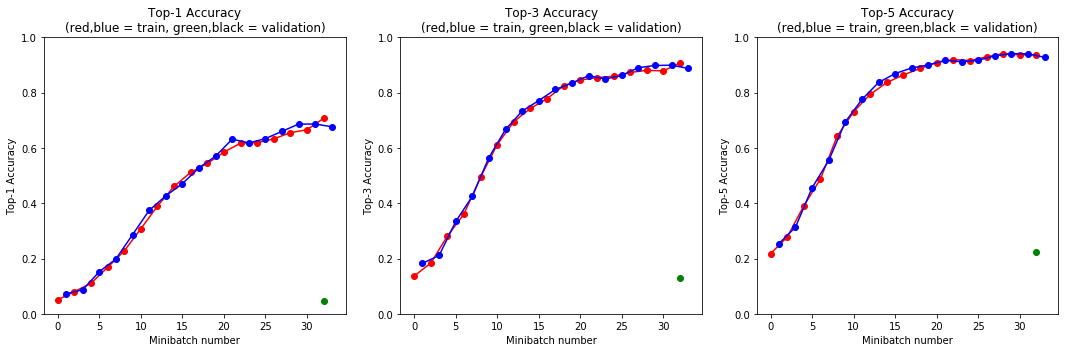

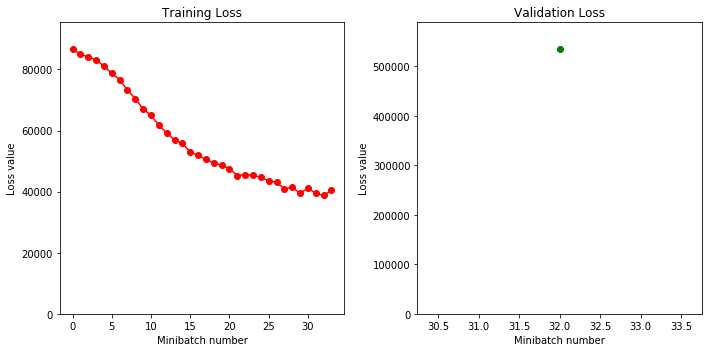

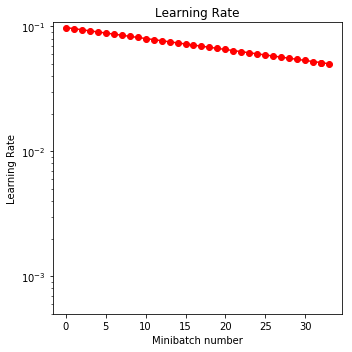

In [16]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model1.recheck2', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch: 102


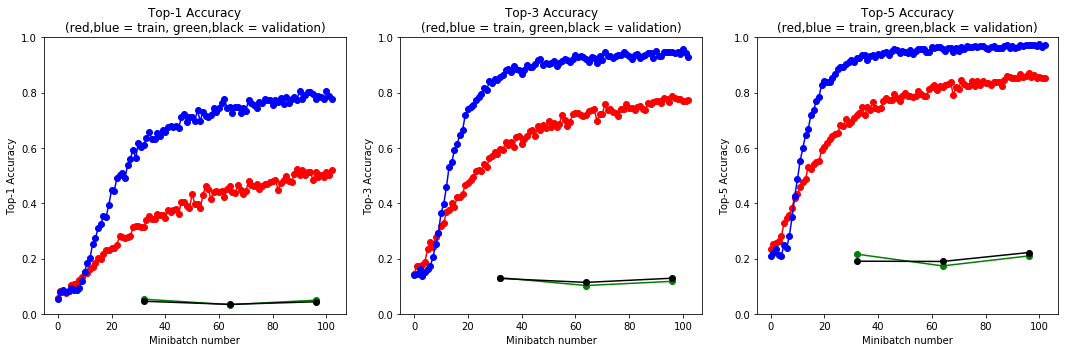

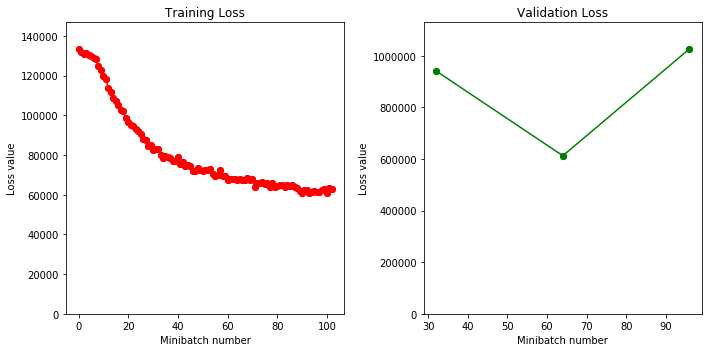

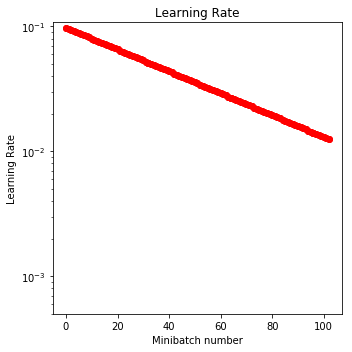

In [4]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model2', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)

In [2]:
%matplotlib inline
def get_data(training_csv):
    with open(training_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = lines[7:] # strip away the logging information
        
        header = lines[0]
        assert len(header.split(', ')) == 15, 'expected 15 columns in header but got {}'.format(len(header.split(', ')))
        lines = lines[1:]
        
        data = []
        for line in lines:
            n, epoch, step, lr, fb, tr_top1, tr_top3, tr_top5, tr_loss, te_top1, te_top3, te_top5, te_loss, ckpt, ckpt_npz = line.split(',')
            d = {
                    'batch_num' : int(n),
                    'learning_rate' : float(lr),
                    'train_top1_acc' : float(tr_top1) if not tr_top1.isspace() else None,
                    'train_top3_acc' : float(tr_top3) if not tr_top3.isspace() else None,
                    'train_top5_acc' : float(tr_top5) if not tr_top5.isspace() else None,
                    'train_loss' : float(tr_loss) if not tr_loss.isspace() else None,
                    'test_top1_acc' : float(te_top1) if not te_top1.isspace() else None,
                    'test_top3_acc' : float(te_top3) if not te_top3.isspace() else None,
                    'test_top5_acc' : float(te_top5) if not te_top5.isspace() else None,
                    'test_loss' : float(te_loss) if not te_loss.isspace() else None,
                    'checkpoint' : ckpt
                }
            data.append(d)
                
        return header, data
    
def plot_accuracy(data, ylim=None):
    try:  
        fig = plt.figure(figsize=(15, 5))
        train_acc = list(filter(lambda x : x['train_top1_acc'] is not None, data))
        train_acc_x = list(map(lambda x : x['batch_num'], train_acc))
        train_acc1_y = list(map(lambda x : x['train_top1_acc'], train_acc))
        train_acc3_y = list(map(lambda x : x['train_top3_acc'], train_acc))
        train_acc5_y = list(map(lambda x : x['train_top5_acc'], train_acc))
        print('batch:', max(train_acc_x))

        test_acc = list(filter(lambda x : x['test_top1_acc'] is not None, data))
        test_acc_x = list(map(lambda x : x['batch_num'], test_acc))
        test_acc1_y = list(map(lambda x : x['test_top1_acc'], test_acc))
        test_acc3_y = list(map(lambda x : x['test_top3_acc'], test_acc))
        test_acc5_y = list(map(lambda x : x['test_top5_acc'], test_acc))

        ax1 = fig.add_subplot(131)
        ax1.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc1_y), max(test_acc1_y))])
        ax1.set_title('Top-1 Accuracy\n(red,blue = train, green,black = validation)')
        ax1.set_xlabel('Minibatch number')
        ax1.set_ylabel('Top-1 Accuracy')
        #ax1.plot(train_acc_x[::2], train_acc1_y[::2], 'ro-', train_acc_x[1::2], train_acc1_y[1::2], 'bo-')
        ax1.plot(train_acc_x[::2], train_acc1_y[::2], 'ro-', train_acc_x[1::2], train_acc1_y[1::2], 'bo-',
                 test_acc_x[::2], test_acc1_y[::2], 'go-', test_acc_x[1::2], test_acc1_y[1::2], 'ko-')

        ax2 = fig.add_subplot(132)
        ax2.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc3_y), max(test_acc3_y))])
        ax2.set_title('Top-3 Accuracy\n(red,blue = train, green,black = validation)')
        ax2.set_xlabel('Minibatch number')
        ax2.set_ylabel('Top-3 Accuracy')
        #ax2.plot(train_acc_x[::2], train_acc3_y[::2], 'ro-', train_acc_x[1::2], train_acc3_y[1::2], 'bo-')
        ax2.plot(train_acc_x[::2], train_acc3_y[::2], 'ro-', train_acc_x[1::2], train_acc3_y[1::2], 'bo-',
                 test_acc_x[::2], test_acc3_y[::2], 'go-', test_acc_x[1::2], test_acc3_y[1::2], 'ko-')

        ax3 = fig.add_subplot(133)
        ax3.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc5_y), max(test_acc5_y))])
        ax3.set_title('Top-5 Accuracy\n(red,blue = train, green,black = validation)')
        ax3.set_xlabel('Minibatch number')
        ax3.set_ylabel('Top-5 Accuracy')
        #ax3.plot(train_acc_x[::2], train_acc5_y[::2], 'ro-', train_acc_x[1::2], train_acc5_y[1::2], 'bo-')
        ax3.plot(train_acc_x[::2], train_acc5_y[::2], 'ro-', train_acc_x[1::2], train_acc5_y[1::2], 'bo-',
                 test_acc_x[::2], test_acc5_y[::2], 'go-', test_acc_x[1::2], test_acc5_y[1::2], 'ko-')

    except: 
        pass
    
    plt.tight_layout()
    
def plot_loss(data):
    try:
        fig = plt.figure(figsize=(10, 5))
        train_loss = list(filter(lambda x : x['train_loss'] is not None, data))
        train_loss_x = list(map(lambda x : x['batch_num'], train_loss))
        train_loss_y = list(map(lambda x : x['train_loss'], train_loss))

        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0, 1.1*max(train_loss_y)])
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Minibatch number')
        ax1.set_ylabel('Loss value')
        ax1.plot(train_loss_x, train_loss_y, 'ro-')

        test_loss = list(filter(lambda x : x['test_loss'] is not None, data))
        test_loss_x = list(map(lambda x : x['batch_num'], test_loss))
        test_loss_y = list(map(lambda x : x['test_loss'], test_loss))
        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.1*max(test_loss_y)])
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Minibatch number')
        ax2.set_ylabel('Loss value')
        ax2.plot(test_loss_x, test_loss_y, 'go-')
    
    except:
        pass
    
    plt.tight_layout()

def plot_learning_rate(data):
    try:
        fig = plt.figure(figsize=(5, 5))
        batch_num = list(map(lambda x : x['batch_num'], data))
        learning_rate = list(map(lambda x : x['learning_rate'], data))

        ax1 = fig.add_subplot(111)
        ax1.set_ylim([0.0005, 1.1*max(learning_rate)])
        ax1.set_title('Learning Rate')
        ax1.set_xlabel('Minibatch number')
        ax1.set_ylabel('Learning Rate')
        ax1.semilogy(batch_num, learning_rate, 'ro-')

    except:
        pass
 
    plt.tight_layout()